In [32]:
import requests
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.support.ui import Select
import matplotlib.colors as mcl

In [33]:
data = pd.read_csv('C:/Users/yjss1/Desktop/e스포츠 데이터 분석가 양성과정/BIPA_data.csv',index_col = 0)
champStat = pd.read_csv('C:/Users/yjss1/Desktop/e스포츠 데이터 분석가 양성과정/champ_stats.csv',index_col=0)

In [34]:
# data = data[data['result'] != 'UNKNOWN']

In [35]:
tierPoint = {'I':0 , 'B':400, 'S':800, 'G':1200, 'P':1600, 'D':2000, 'M':2400, 'R':2800, 'C':3200}
inv_tierPoint = {0:'I',  1:'B', 2:'S', 3:'G', 4:'P', 5:'D', 6:'M', 7:'R', 8:'C'}

In [36]:
def get_meanTier(gameId):
    
    summonerRank = data[data['gameId']==gameId]['tierRank']
    cnt = 0
    pointSum = 0
    
    for tier in summonerRank:
        try:
            pointSum += tierPoint[tier[0]]
            pointSum += (4-int(tier[1]))*100
            cnt += 1
        except:
            pass
    
    if cnt == 0:
        return "0000"
        
    pointSum /= cnt
    tier = inv_tierPoint[int(pointSum/400)]
    division = math.ceil((400-pointSum%400)/100)
    temp = tier + str(division)

    return temp

In [37]:
nanTierList_idx = data[data['tierRank'].isnull()].index

In [38]:
for idx in nanTierList_idx:
    data.at[idx, 'tierRank'] = get_meanTier(data.iloc[idx]['gameId'])

In [39]:
data['tier'] = data['tierRank'].str[0]
data['division'] = data['tierRank'].str[1]
data = data.drop(['tierRank'], axis=1)
data.head(3)

,gameId,createDate,position,teamId,summonerId,championId,result,level,championsKilled,numDeaths,...,neutralMinionsKilledTeamJungle,visionScore,damageSelfMitigated,damageDealtToObjectives,damageDealtToTurrets,lane,gameLength,version,tier,division
0,5383880006,2021-08-11 06:59:31,S,200,3210877,99,WIN,10,4,1,...,0,11,2830,2181,2181,NONE,972,11.16.390.1945,P,3
1,5383880006,2021-08-11 06:59:31,S,100,7550211,35,LOSE,8,1,3,...,2,24,2013,0,0,NONE,972,11.16.390.1945,P,4
2,5383880006,2021-08-11 06:59:31,M,200,9306696,266,WIN,11,5,1,...,0,15,6158,585,585,NONE,972,11.16.390.1945,P,3


In [40]:
for i in tierPoint.keys():
    data.loc[data['tier']==i,'mmr'] = tierPoint[i] + (4 - pd.to_numeric(data['division'])) * 100

In [41]:
data = data[['tier', 'division', 'mmr', 'position', 'level', 'minionsKilled', 'championsKilled', 'numDeaths', 'assists', 'wardPlaced', 'visionWardsBoughtInGame', 'wardKilled', 'goldEarned', 'totalDamageDealtToChampions', 'gameLength']]

In [42]:
nanidx = data[data['tier']=='0'].index
data = data.drop(nanidx)

In [43]:
################################################################

In [44]:
data.head(3)

,tier,division,mmr,position,level,minionsKilled,championsKilled,numDeaths,assists,wardPlaced,visionWardsBoughtInGame,wardKilled,goldEarned,totalDamageDealtToChampions,gameLength
0,P,3,1700.0,S,10,15,4,1,5,5,1,1,6083,5590,972
1,P,4,1600.0,S,8,7,1,3,3,6,3,3,4118,3827,972
2,P,3,1700.0,M,11,100,5,1,5,7,4,5,6769,9467,972


In [45]:
data = data[data['gameLength'] >= 600]

In [46]:
data

,tier,division,mmr,position,level,minionsKilled,championsKilled,numDeaths,assists,wardPlaced,visionWardsBoughtInGame,wardKilled,goldEarned,totalDamageDealtToChampions,gameLength
0,P,3,1700.0,S,10,15,4,1,5,5,1,1,6083,5590,972
1,P,4,1600.0,S,8,7,1,3,3,6,3,3,4118,3827,972
2,P,3,1700.0,M,11,100,5,1,5,7,4,5,6769,9467,972
3,P,4,1600.0,T,11,115,8,2,1,5,1,0,7972,10963,972
4,P,3,1700.0,A,10,110,3,2,9,5,1,2,7552,6465,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,S,1,1100.0,S,15,29,1,11,7,29,4,7,8451,10019,2379
999996,G,4,1200.0,M,18,251,10,6,3,8,0,1,18291,37581,2379
999997,G,4,1200.0,J,17,40,5,5,22,13,3,2,12986,20994,2379
999998,S,1,1100.0,A,17,260,6,5,3,11,1,4,15674,37078,2379


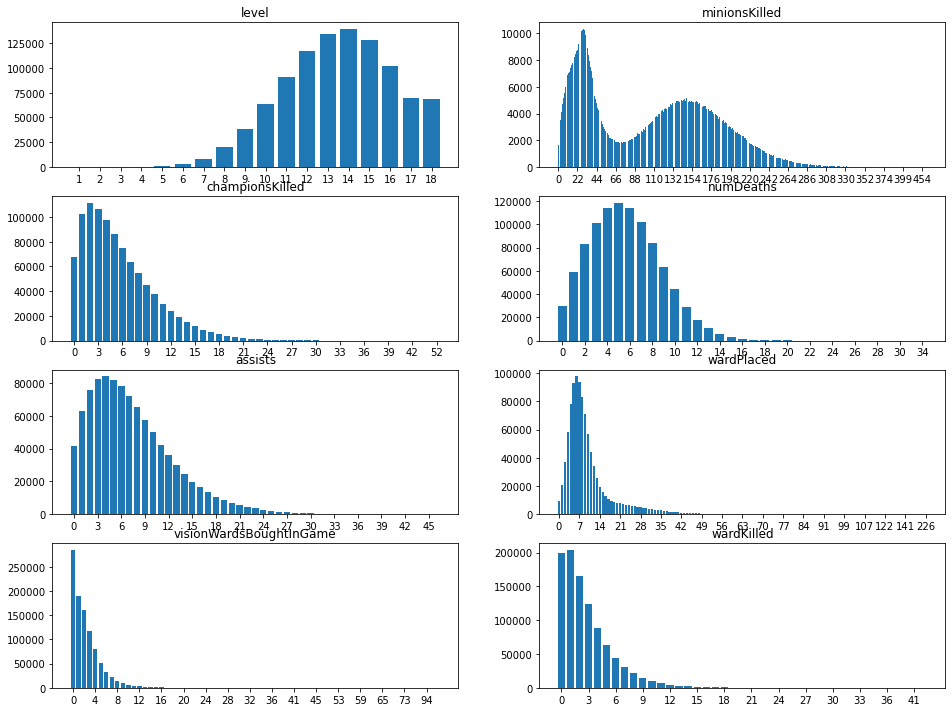

In [47]:
# 이상치 제거 전 그래프

ind = 1
plt.figure(figsize=(16,16))
plt.subplots_adjust(bottom=0.001)

for col in ['level', 'minionsKilled', 'championsKilled', 'numDeaths', 'assists', 'wardPlaced','visionWardsBoughtInGame', 'wardKilled']: 
    plt.subplot(6, 2, ind)
    plt.title(col)
    
    d = data[col]
    
    uniquelist = sorted(list(d.unique()))
    length = len(uniquelist)

    y = [0 for _ in range(length)]
    for i in range(length):
        y[i] = len(d[d == uniquelist[i]])


    x = range(len(d.unique()))
    plt.bar(x, y)
    plt.xticks(x, uniquelist)
    plt.locator_params(axis='x', nbins=20)
    ind += 1

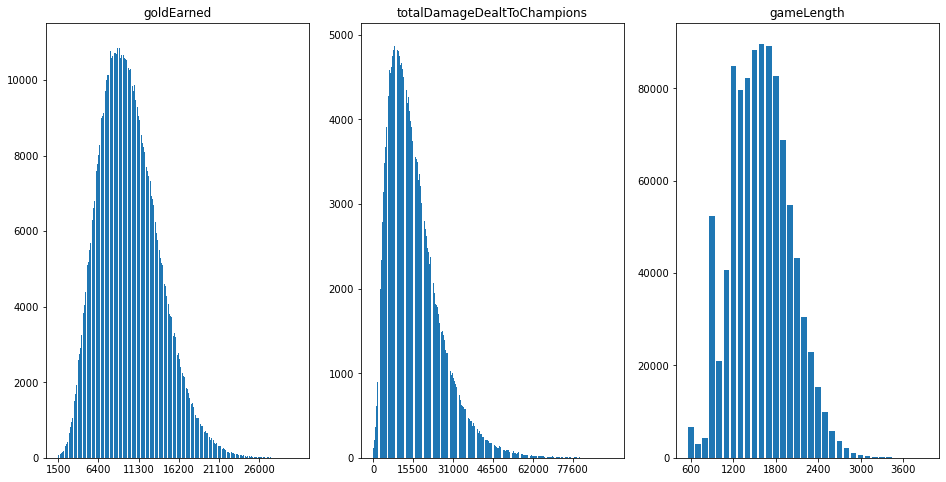

In [48]:
# 이상치 제거 전 그래프
ind = 1
plt.figure(figsize=(16, 8))

for col in ['goldEarned', 'totalDamageDealtToChampions', 'gameLength']:
    plt.subplot(1, 3, ind)
    plt.title(col)

    d = data[col]
    d = round(d//100, 2) * 100

    uniquelist = sorted(list(d.unique()))
    length = len(uniquelist)

    y = [0 for _ in range(length)]
    for i in range(length):
        y[i] = len(d[d == uniquelist[i]])


    x = range(len(d.unique()))
    plt.bar(x, y)
    plt.xticks(x, uniquelist)
    plt.locator_params(axis='x', nbins=6)
    ind += 1

In [49]:
# 위에 그래프들을 통해서 --> 이상치 제거 기준을 세울 수 있다
# level : 하위 0.3퍼 제거
# 'minionsKilled', 'championsKilled', 'numDeaths', 'assists', 'wardPlaced','visionWardsBoughtInGame', 'wardKilled' : 상위 0.3퍼 제거
# 'goldEarned', 'totalDamageDealtToChampions', 'gameLength' : 하위, 상위 0.3퍼 제거

In [50]:
# processed_data : 이상치가 제거된 데이터 

processed_data = data
want_data = ['level', 'minionsKilled', 'championsKilled', 'numDeaths', 'assists', 'wardPlaced', 'visionWardsBoughtInGame', 'wardKilled', 'goldEarned', 'totalDamageDealtToChampions', 'gameLength']
# 하위 0.3퍼, 상위 0.3퍼 데이터를 제거한다
for col in want_data:
    minimum = data[col].quantile(0.003)
    maximum = data[col].quantile(0.997)
    if col == 'level':
        processed_data = processed_data[data[col] > minimum]
    
    elif col in ['minionsKilled', 'championsKilled', 'numDeaths', 'assists', 'wardPlaced','visionWardsBoughtInGame', 'wardKilled']:
        processed_data = processed_data[data[col] < maximum]
    
    else:
         processed_data = processed_data[processed_data[col] < maximum]
         processed_data = processed_data[processed_data[col] > minimum]   

C:\Users\yjss1\AppData\Local\Temp/ipykernel_15832/4274930411.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  processed_data = processed_data[data[col] < maximum]


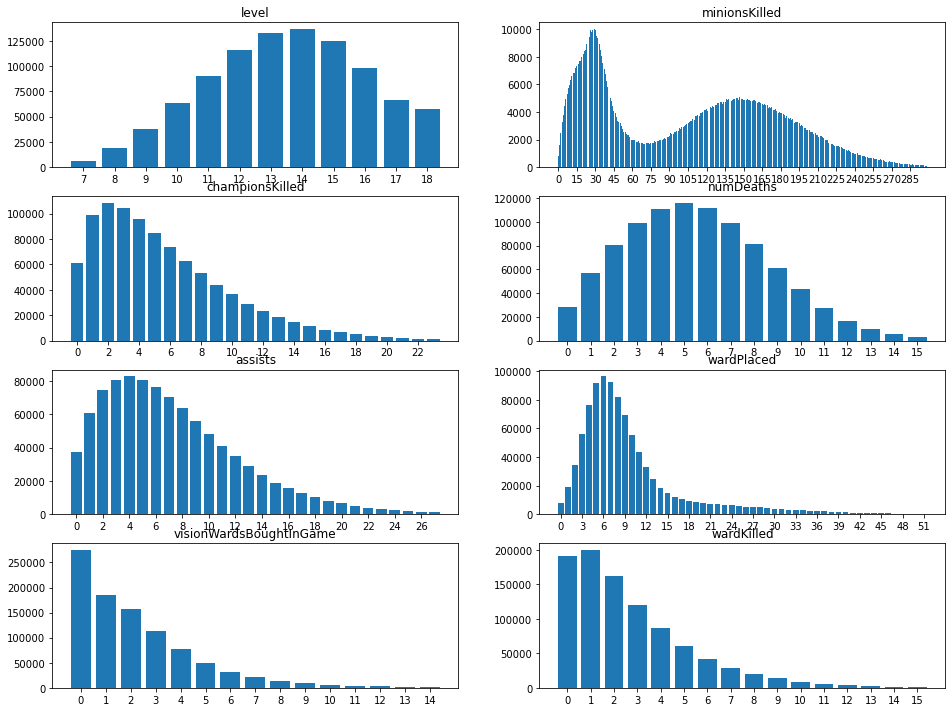

In [51]:
# 이상치 제거 후 그래프

ind = 1
plt.figure(figsize=(16,16))
plt.subplots_adjust(bottom=0.001)

for col in ['level', 'minionsKilled', 'championsKilled', 'numDeaths', 'assists', 'wardPlaced','visionWardsBoughtInGame', 'wardKilled']: 
    plt.subplot(6, 2, ind)
    plt.title(col)
    
    d = processed_data[col]
    
    uniquelist = sorted(list(d.unique()))
    length = len(uniquelist)

    y = [0 for _ in range(length)]
    for i in range(length):
        y[i] = len(d[d == uniquelist[i]])


    x = range(len(d.unique()))
    plt.bar(x, y)
    plt.xticks(x, uniquelist)
    plt.locator_params(axis='x', nbins=20)
    ind += 1

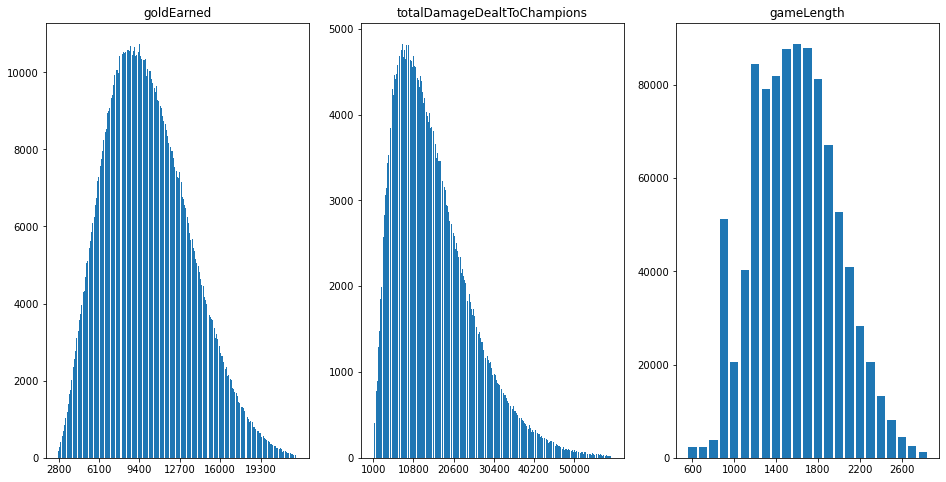

In [52]:
# 이상치 제거 후 그래프

ind = 1
plt.figure(figsize=(16, 8))

for col in ['goldEarned', 'totalDamageDealtToChampions', 'gameLength']:
    plt.subplot(1, 3, ind)
    plt.title(col)

    d = processed_data[col]
    d = round(d//100, 2) * 100

    uniquelist = sorted(list(d.unique()))
    length = len(uniquelist)

    y = [0 for _ in range(length)]
    for i in range(length):
        y[i] = len(d[d == uniquelist[i]])


    x = range(len(d.unique()))
    plt.bar(x, y)
    plt.xticks(x, uniquelist)
    plt.locator_params(axis='x', nbins=6)
    ind += 1

In [53]:
processed_data['gameLength'] /= 60

In [54]:
processed_data

,tier,division,mmr,position,level,minionsKilled,championsKilled,numDeaths,assists,wardPlaced,visionWardsBoughtInGame,wardKilled,goldEarned,totalDamageDealtToChampions,gameLength
0,P,3,1700.0,S,10,15,4,1,5,5,1,1,6083,5590,16.20
1,P,4,1600.0,S,8,7,1,3,3,6,3,3,4118,3827,16.20
2,P,3,1700.0,M,11,100,5,1,5,7,4,5,6769,9467,16.20
3,P,4,1600.0,T,11,115,8,2,1,5,1,0,7972,10963,16.20
4,P,3,1700.0,A,10,110,3,2,9,5,1,2,7552,6465,16.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,S,1,1100.0,S,15,29,1,11,7,29,4,7,8451,10019,39.65
999996,G,4,1200.0,M,18,251,10,6,3,8,0,1,18291,37581,39.65
999997,G,4,1200.0,J,17,40,5,5,22,13,3,2,12986,20994,39.65
999998,S,1,1100.0,A,17,260,6,5,3,11,1,4,15674,37078,39.65


In [55]:
for it in processed_data.columns[4:len(processed_data.columns)-1]:
    processed_data[it] /= processed_data['gameLength']
processed_data = processed_data.drop(columns='gameLength')

In [56]:
processed_data.head(3)

,tier,division,mmr,position,level,minionsKilled,championsKilled,numDeaths,assists,wardPlaced,visionWardsBoughtInGame,wardKilled,goldEarned,totalDamageDealtToChampions
0,P,3,1700.0,S,0.617284,0.925926,0.246914,0.061728,0.308642,0.308642,0.061728,0.061728,375.493827,345.061728
1,P,4,1600.0,S,0.493827,0.432099,0.061728,0.185185,0.185185,0.370370,0.185185,0.185185,254.197531,236.234568
2,P,3,1700.0,M,0.679012,6.172840,0.308642,0.061728,0.308642,0.432099,0.246914,0.308642,417.839506,584.382716


In [57]:
# 확인하고 싶은 아이디 입력
summoner_name = '내가잘했구나'

In [58]:
# selenium을 백그라운드로 실행하기 위해 옵션 설정
options = webdriver.ChromeOptions()
options.add_argument('headless')
options.add_argument('window-size=1920x1080')

In [59]:
# selenium으로 실행시킬 url설정
summoner_url = 'https://poro.gg/summoner/kr/' + summoner_name
chrome_driver_path = "C:/Users/yjss1/Desktop/chromedriver_win32/chromedriver"
driver = webdriver.Chrome(chrome_driver_path)

driver.get(summoner_url)

C:\Users\yjss1\AppData\Local\Temp/ipykernel_15832/2523451759.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(chrome_driver_path)


In [60]:
# 솔로랭크의 자료만을 원하므로, 솔로랭크 버튼 클릭
solo_rank_button = driver.find_element_by_css_selector("#vue-profile > div.match-history-container.mt-3 > div:nth-child(1) > div.summoner-box__content > div > div.match-history-filter__queue-types > button:nth-child(2)")
solo_rank_button.click()
time.sleep(2)

C:\Users\yjss1\AppData\Local\Temp/ipykernel_15832/2064555884.py:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  solo_rank_button = driver.find_element_by_css_selector("#vue-profile > div.match-history-container.mt-3 > div:nth-child(1) > div.summoner-box__content > div > div.match-history-filter__queue-types > button:nth-child(2)")


In [61]:
# 컨테이너의 정보들은, start가 3부터 시작해서, 1씩 더해지며 쌓인다.
# 각 컨테이너 마다 (+) 버튼 눌러주는 코드
start = 3
while True:
    try:
        driver.find_element_by_css_selector("#vue-profile > div.match-history-container.mt-3 > div:nth-child(" + str(start) + ") > div > div.match-history__expand-toggle").click()
        time.sleep(2)
        start += 1
    
    except Exception as e:
        pass
        break

C:\Users\yjss1\AppData\Local\Temp/ipykernel_15832/48261511.py:6: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_css_selector("#vue-profile > div.match-history-container.mt-3 > div:nth-child(" + str(start) + ") > div > div.match-history__expand-toggle").click()


In [62]:
# 전체 펼친 html
summoner_html = driver.page_source
summoner_soup = BeautifulSoup(summoner_html, 'html.parser')

In [63]:
driver.quit()

In [64]:
# 내 티어 정보
mysolorank_info = list(summoner_soup.select('div.summoner-tier__description'))[0]
mytier = list(mysolorank_info.stripped_strings)[0]
mylst = mytier.split('\n')

tierdict = {'아이언' : 'I', '브론즈' : 'B', '실버' : 'S', '골드' : 'G', '플래티넘' : 'P', 
 '다이아몬드' : 'D', '마스터' : 'M', '그랜드마스터' : 'R', '챌린저' : 'C'}

my_tier = tierdict[mylst[0]]
my_division = mylst[1].lstrip()
print(my_tier, my_division)

G 2


In [65]:
# 불러오는 게임의 수
# games_len = len(summoner_games_html)

summoner_games_html = summoner_soup.select('div.match-history__content')
games_len = 20

In [66]:
# 확인하고 싶은 자료 선정
Damage = []
CS = []
Wardplaced = []
visionWardplaced = []
WardKilled = []
Kill = []
Death = []
Assist = []
Level = []
Gold = []
Gamelength = []
Position = []

In [67]:
# 각각의 정보들을 각 리스트에 담아준다.

for i in range(games_len):
    Level.append(int(list(summoner_games_html[i].select_one('div.champion').stripped_strings)[0]))
    CS.append(int(list(summoner_games_html[i].select_one('div.info').stripped_strings)[3]))
    Kill.append(int(list(summoner_games_html[i].select_one('div.kda').stripped_strings)[0]))
    Death.append(int(list(summoner_games_html[i].select_one('div.kda').stripped_strings)[2]))
    Assist.append(int(list(summoner_games_html[i].select_one('div.kda').stripped_strings)[4]))
    Wardplaced.append(int(list(summoner_games_html[i].select_one(' div.wards.mt-1').stripped_strings)[1]))
    visionWardplaced.append(int(list(summoner_games_html[i].select_one(' div.wards.mt-1').stripped_strings)[0]))
    WardKilled.append(int(list(summoner_games_html[i].select_one(' div.wards.mt-1').stripped_strings)[2]))
    gl = list(summoner_games_html[i].select_one('span.mt-md-1'))[0].split(':')
    Gamelength.append(int(gl[0])*60 + int(gl[1]))

In [68]:
# 각 게임의 '자세히보기' 버튼을 눌러야 나오는 정보들을 담는 코드

summoner_results_html = summoner_soup.select('div.match-history__result')
for i in range(games_len):
    if list(summoner_results_html[i].stripped_strings)[0] == '패배':
        summoner_details_html = summoner_soup.select('div.match-history-detail__content')
        gold_selector = '#vue-profile > div.match-history-container.mt-3 > div:nth-child(' + str(i+3) + ') > div.match-history-detail > div.match-history-detail__content > div > div > div.col-12.col-lg-6.border-e6-left-md > div > div.match-detail-overview__summoners > div.match-detail-overview__summoner.match-detail-overview__summoner--me > div > div.match-detail-overview__summoner__column.stats > div.wards > div:nth-child(2) > span'
        damage_selector = '#vue-profile > div.match-history-container.mt-3 > div:nth-child(' + str(i+3) + ') > div.match-history-detail > div.match-history-detail__content > div > div > div.col-12.col-lg-6.border-e6-left-md > div > div.match-detail-overview__summoners > div.match-detail-overview__summoner.match-detail-overview__summoner--me > div > div.match-detail-overview__summoner__column.stats > div.graph > span'
        position_selector = '#vue-profile > div.match-history-container.mt-3 > div:nth-child(' + str(i+3) + ') > div.match-history-detail > div.match-history-detail__content > div > div > div.col-12.col-lg-6.border-e6-left-md > div > div.match-detail-overview__summoners'
    elif list(summoner_results_html[i].stripped_strings)[0] == '승리':
        summoner_details_html = summoner_soup.select('div.match-history-detail__content')
        gold_selector = '#vue-profile > div.match-history-container.mt-3 > div:nth-child(' + str(i+3) + ') > div.match-history-detail > div.match-history-detail__content > div > div > div:nth-child(1) > div > div.match-detail-overview__summoners > div.match-detail-overview__summoner.match-detail-overview__summoner--me > div > div.match-detail-overview__summoner__column.stats > div.wards > div:nth-child(2) > span'
        damage_selector = '#vue-profile > div.match-history-container.mt-3 > div:nth-child(' + str(i+3) + ') > div.match-history-detail > div.match-history-detail__content > div > div > div:nth-child(1) > div > div.match-detail-overview__summoners > div.match-detail-overview__summoner.match-detail-overview__summoner--me > div > div.match-detail-overview__summoner__column.stats > div.graph > span'
        position_selector = '#vue-profile > div.match-history-container.mt-3 > div:nth-child(' + str(i+3) + ') > div.match-history-detail > div.match-history-detail__content > div > div > div:nth-child(1) > div > div.match-detail-overview__summoners'
    gold = list(summoner_details_html[i].select_one(gold_selector).stripped_strings)[0]
    damage = list(summoner_details_html[i].select_one(damage_selector).stripped_strings)[0]
    
    position = ['T' ,'J', 'M', 'A', 'S']
    for j in range(5):
        if summoner_name in list(summoner_details_html[i].select_one(position_selector).stripped_strings)[17*j:17*(j+1)]:
            Position.append(position[j])
            break
            
    if gold[-1] == '천':
        g = float(gold[:-1])
        g = int(g * 1000)
        Gold.append(g)
        
    elif gold[-1] == '만':
        g = float(gold[:-1])
        g = int(g * 10000)
        Gold.append(g)
        
    if ',' in damage:
        damage = damage.replace(',', '')
    damage = int(damage)
    Damage.append(damage)
    
    time.sleep(1)

In [69]:
# mydf : 내 게임전적 데이터를 저장한 df
# ['Position', 'Kill', 'Death', 'Assist', 'CS', 'Level', 'Damage', 'Wardplaced', 'visionWardplaced', 'WardKilled', 'Gold', 'Gamelength']

mydf = pd.DataFrame({'tier' : my_tier, 'division' : my_division, 'Position' : Position, 'Kill' : Kill, 'Death' : Death, 'Assist' : Assist,
                    'CS' : CS, 'Level' : Level, 'Damage' : Damage, 'Wardplaced' : Wardplaced,
                   'visionWardplaced' : visionWardplaced, 'WardKilled' : WardKilled,
                     'Gold' : Gold, 'Gamelength' : Gamelength})
mydf

,tier,division,Position,Kill,Death,Assist,CS,Level,Damage,Wardplaced,visionWardplaced,WardKilled,Gold,Gamelength
0,G,2,M,2,3,1,159,12,7032,8,3,1,8000,1212
1,G,2,A,7,7,0,152,11,13147,2,1,2,9600,1298
2,G,2,M,22,8,8,197,17,35649,4,3,3,17000,1888
3,G,2,A,3,3,16,365,18,25381,10,3,6,16000,2136
4,G,2,A,4,0,0,85,7,2160,2,0,2,5000,613
5,G,2,A,7,4,5,147,11,11408,4,2,4,8700,1081
6,G,2,M,9,8,3,132,13,17335,6,2,1,9500,1321
7,G,2,A,3,6,7,239,14,18912,13,4,3,11000,1727
8,G,2,A,11,5,4,236,14,17790,9,0,9,14000,1777
9,G,2,A,3,8,1,132,10,10505,8,3,1,6900,1204


In [70]:
for i in tierPoint.keys():
    mydf.loc[mydf['tier']==i,'mmr'] = tierPoint[i] + (4 - pd.to_numeric(mydf['division'])) * 100
my_mmr = mydf['mmr'][0]

In [71]:
mydf = mydf[['tier', 'division', 'mmr', 'Position', 'Kill', 'Death', 'Assist', 'CS', 'Level', 'Damage', 'Wardplaced', 'visionWardplaced', 'WardKilled', 'Gold', 'Gamelength']]

In [72]:
mydf

,tier,division,mmr,Position,Kill,Death,Assist,CS,Level,Damage,Wardplaced,visionWardplaced,WardKilled,Gold,Gamelength
0,G,2,1400,M,2,3,1,159,12,7032,8,3,1,8000,1212
1,G,2,1400,A,7,7,0,152,11,13147,2,1,2,9600,1298
2,G,2,1400,M,22,8,8,197,17,35649,4,3,3,17000,1888
3,G,2,1400,A,3,3,16,365,18,25381,10,3,6,16000,2136
4,G,2,1400,A,4,0,0,85,7,2160,2,0,2,5000,613
5,G,2,1400,A,7,4,5,147,11,11408,4,2,4,8700,1081
6,G,2,1400,M,9,8,3,132,13,17335,6,2,1,9500,1321
7,G,2,1400,A,3,6,7,239,14,18912,13,4,3,11000,1727
8,G,2,1400,A,11,5,4,236,14,17790,9,0,9,14000,1777
9,G,2,1400,A,3,8,1,132,10,10505,8,3,1,6900,1204


In [73]:
# my_processed_data : 나의 포지션별 분당 데이터

my_processed_data = mydf.groupby('Position').mean()

my_processed_data['Gamelength'] /= 60

for col in my_processed_data.columns[1:]:
    my_processed_data[col] /= my_processed_data['Gamelength']

my_processed_data = my_processed_data.drop('Gamelength', axis = 1)
my_processed_data

,mmr,Kill,Death,Assist,CS,Level,Damage,Wardplaced,visionWardplaced,WardKilled,Gold
Position,,,,,,,,,,,
A,1400.0,0.245199,0.207323,0.241212,7.619111,0.478437,787.999867,0.328926,0.051831,0.131570,439.364742
M,1400.0,0.447862,0.257860,0.162859,6.622936,0.570007,814.512554,0.244289,0.108573,0.067858,468.219860


In [74]:
my_processed_data = my_processed_data.reset_index()
my_processed_data.index = ['Me'] * len(my_processed_data)
my_processed_data

,Position,mmr,Kill,Death,Assist,CS,Level,Damage,Wardplaced,visionWardplaced,WardKilled,Gold
Me,A,1400.0,0.245199,0.207323,0.241212,7.619111,0.478437,787.999867,0.328926,0.051831,0.131570,439.364742
Me,M,1400.0,0.447862,0.257860,0.162859,6.622936,0.570007,814.512554,0.244289,0.108573,0.067858,468.219860


In [75]:
# my_processed_data에 위에서 구한 내 티어와 division을 추가하고, 정렬한다

my_processed_data['tier'] = my_tier
my_processed_data['division'] = my_division
# my_processed_data['mmr'] = mydf.loc[mydf['tier']==i,'mmr']
my_processed_data = my_processed_data[['tier', 'division', 'mmr', 'Position', 'Kill', 'Death', 'Assist', 'CS', 'Level', 'Damage', 'Wardplaced', 'visionWardplaced', 'WardKilled', 'Gold']]
my_processed_data

,tier,division,mmr,Position,Kill,Death,Assist,CS,Level,Damage,Wardplaced,visionWardplaced,WardKilled,Gold
Me,G,2,1400.0,A,0.245199,0.207323,0.241212,7.619111,0.478437,787.999867,0.328926,0.051831,0.131570,439.364742
Me,G,2,1400.0,M,0.447862,0.257860,0.162859,6.622936,0.570007,814.512554,0.244289,0.108573,0.067858,468.219860


In [76]:
# processed_data : 전체 데이터의 분당 데이터
# processed_data column의 이름과 순서를 바꾸어준다.

processed_data = processed_data.rename(columns = {'position' : 'Position',
                                'level' : 'Level',
                                'minionsKilled' : 'CS',
                                'championsKilled' : 'Kill',
                                'numDeaths' : 'Death',
                                'assists' : 'Assist',
                                'wardPlaced' : 'Wardplaced',
                                'visionWardsBoughtInGame' : 'visionWardplaced',
                                'wardKilled' : 'WardKilled',
                                'goldEarned' : 'Gold',
                                'totalDamageDealtToChampions' : 'Damage'})

processed_data = processed_data[['tier', 'division', 'mmr', 'Position', 'Kill', 'Death', 'Assist', 'CS', 'Level', 'Damage', 'Wardplaced', 'visionWardplaced', 'WardKilled', 'Gold']]

processed_data

,tier,division,mmr,Position,Kill,Death,Assist,CS,Level,Damage,Wardplaced,visionWardplaced,WardKilled,Gold
0,P,3,1700.0,S,0.246914,0.061728,0.308642,0.925926,0.617284,345.061728,0.308642,0.061728,0.061728,375.493827
1,P,4,1600.0,S,0.061728,0.185185,0.185185,0.432099,0.493827,236.234568,0.370370,0.185185,0.185185,254.197531
2,P,3,1700.0,M,0.308642,0.061728,0.308642,6.172840,0.679012,584.382716,0.432099,0.246914,0.308642,417.839506
3,P,4,1600.0,T,0.493827,0.123457,0.061728,7.098765,0.679012,676.728395,0.308642,0.061728,0.000000,492.098765
4,P,3,1700.0,A,0.185185,0.123457,0.555556,6.790123,0.617284,399.074074,0.308642,0.061728,0.123457,466.172840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,S,1,1100.0,S,0.025221,0.277427,0.176545,0.731400,0.378310,252.686003,0.731400,0.100883,0.176545,213.139975
999996,G,4,1200.0,M,0.252207,0.151324,0.075662,6.330391,0.453972,947.818411,0.201765,0.000000,0.025221,461.311475
999997,G,4,1200.0,J,0.126103,0.126103,0.554855,1.008827,0.428752,529.482976,0.327869,0.075662,0.050441,327.515763
999998,S,1,1100.0,A,0.151324,0.126103,0.075662,6.557377,0.428752,935.132409,0.277427,0.025221,0.100883,395.308953


In [77]:
# 나와, 모든 유저들의 각 라인별 분당 데이터를 저장한다.

my_Top = my_processed_data[my_processed_data['Position'] == 'T']
my_Jungle = my_processed_data[my_processed_data['Position'] == 'J']
my_Mid = my_processed_data[my_processed_data['Position'] == 'M']
my_Adc = my_processed_data[my_processed_data['Position'] == 'A']
my_Sup = my_processed_data[my_processed_data['Position'] == 'S']

Top = processed_data[processed_data['Position'] == 'T']
Jungle = processed_data[processed_data['Position'] == 'J']
Mid = processed_data[processed_data['Position'] == 'M']
Adc = processed_data[processed_data['Position'] == 'A']
Sup = processed_data[processed_data['Position'] == 'S']

In [78]:
# my_ . _rank : 내 데이터와 전체 데이터를 합치고, rank함수를 통해 내가 상위 몇퍼인지 저장한다.

rank_index = ['Kill', 'Death', 'Assist', 'CS', 'Level', 'Damage', 'Wardplaced', 'visionWardplaced', 'WardKilled', 'Gold']

Top = pd.concat([my_Top, Top])
Jungle = pd.concat([my_Jungle, Jungle])
Mid = pd.concat([my_Mid, Mid])
Adc = pd.concat([my_Adc, Adc])
Sup = pd.concat([my_Sup, Sup])

In [79]:
# 각 라인별 지표들에 rank를 적용한다. 
# (ascending = False를 쓸 경우 : 지표가 높을수록 좋은 것 (예: 킬, 어시))
# (ascending = True를 쓸 경우 : 지표가 낮을수록 좋은 것 (예: 데스))
# True를 쓰는 경우는, Death밖에 없다.
# 우선 모든 데이터에 ascending = False만 적용하고, Death를 따로 True 해준다

Top_rank = Top[rank_index].rank(ascending = False, pct = True)
Jungle_rank = Jungle[rank_index].rank(ascending = False, pct = True)
Mid_rank = Mid[rank_index].rank(ascending = False, pct = True)
Adc_rank = Adc[rank_index].rank(ascending = False, pct = True)
Sup_rank = Sup[rank_index].rank(ascending = False, pct = True)

Top_rank['Death'] = Top['Death'].rank(ascending = True, pct = True)
Jungle_rank['Death'] = Jungle['Death'].rank(ascending = True, pct = True)
Mid_rank['Death'] = Mid['Death'].rank(ascending = True, pct = True)
Adc_rank['Death'] = Adc['Death'].rank(ascending = True, pct = True)
Sup_rank['Death'] = Sup['Death'].rank(ascending = True, pct = True)

In [80]:
# 각 라인 데이터에서 내꺼만 뽑아온다

my_Top_rank = Top_rank[Top_rank.index == 'Me']
my_Jungle_rank = Jungle_rank[Jungle.index == 'Me']
my_Mid_rank = Mid_rank[Mid_rank.index == 'Me']
my_Adc_rank = Adc_rank[Adc_rank.index == 'Me']
my_Sup_rank = Sup_rank[Sup_rank.index == 'Me']

In [81]:
# 내가 상위 몇 퍼센트인지 나타낸 최종 데이터

my_Top_rank = round(my_Top_rank*100).astype(int)
my_Jungle_rank = round(my_Jungle_rank*100).astype(int)
my_Mid_rank = round(my_Mid_rank*100).astype(int)
my_Adc_rank = round(my_Adc_rank*100).astype(int)
my_Sup_rank = round(my_Sup_rank*100).astype(int)
my_Total_rank = pd.concat([my_Top_rank, my_Jungle_rank, my_Mid_rank, my_Adc_rank, my_Sup_rank])

In [96]:
# 나의 서폿이 상위 몇퍼인지 나온다

my_Mid_rank

,Kill,Death,Assist,CS,Level,Damage,Wardplaced,visionWardplaced,WardKilled,Gold
Me,11,69,58,22,27,23,62,24,43,18


<AxesSubplot:>

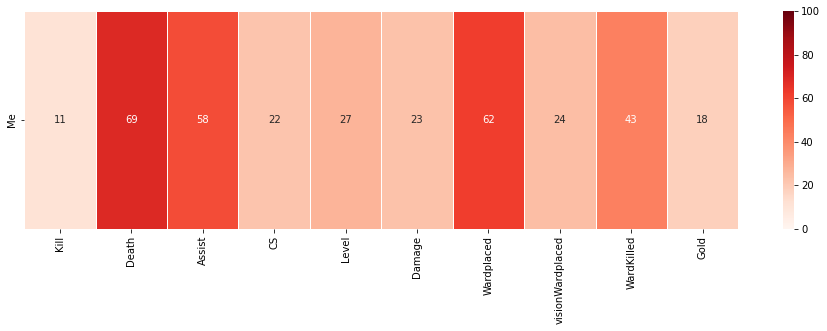

In [97]:
plt.figure(figsize = (16, 4))
sns.heatmap(my_Mid_rank, vmin = 0, vmax = 100, annot=True, linewidths = 0.5,  fmt='d', cmap = 'Reds', center = 50)

In [84]:
# h = 233
# s = 0.73
# v = 0.96

# colors = [
#     mcl.hsv_to_rgb((h/360,0,v)),
#     mcl.hsv_to_rgb((h/360,0.5,v)),
#     mcl.hsv_to_rgb((h/360,1,v))
# ]
# cmap = LinearSegmentedColormap.from_list('my_cmap',colors,gamma=3)

In [85]:
my_processed_data

,tier,division,mmr,Position,Kill,Death,Assist,CS,Level,Damage,Wardplaced,visionWardplaced,WardKilled,Gold
Me,G,2,1400.0,A,0.245199,0.207323,0.241212,7.619111,0.478437,787.999867,0.328926,0.051831,0.131570,439.364742
Me,G,2,1400.0,M,0.447862,0.257860,0.162859,6.622936,0.570007,814.512554,0.244289,0.108573,0.067858,468.219860


In [86]:
total_data = pd.concat([my_processed_data, processed_data])
d = total_data[total_data['mmr'] < my_mmr+200].copy()
d = d[d['mmr'] > my_mmr-200]
d

,tier,division,mmr,Position,Kill,Death,Assist,CS,Level,Damage,Wardplaced,visionWardplaced,WardKilled,Gold
Me,G,2,1400.0,A,0.245199,0.207323,0.241212,7.619111,0.478437,787.999867,0.328926,0.051831,0.131570,439.364742
Me,G,2,1400.0,M,0.447862,0.257860,0.162859,6.622936,0.570007,814.512554,0.244289,0.108573,0.067858,468.219860
20,G,2,1400.0,S,0.076579,0.344608,0.306318,3.292916,0.459477,355.137205,0.650925,0.114869,0.268028,265.500957
30,G,2,1400.0,A,0.074488,0.260708,0.148976,6.033520,0.446927,426.182495,0.260708,0.037244,0.037244,330.875233
31,G,3,1300.0,A,0.372439,0.111732,0.148976,7.225326,0.558659,755.232775,0.409683,0.111732,0.148976,497.355680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999986,G,1,1500.0,M,0.290206,0.108827,0.399033,6.711004,0.544135,898.802902,0.399033,0.108827,0.108827,461.245466
999987,G,1,1500.0,J,0.217654,0.036276,0.217654,1.523579,0.544135,610.519952,0.108827,0.036276,0.108827,390.979444
999988,G,1,1500.0,A,0.108827,0.108827,0.471584,3.663845,0.471584,365.114873,0.834341,0.145103,0.217654,330.544135
999989,G,2,1400.0,M,0.072551,0.217654,0.072551,5.477630,0.471584,408.319226,0.290206,0.108827,0.145103,313.313180


In [87]:
d[d.columns[4:]] = d[d.columns[4:]].rank(ascending = False, pct = True)

In [88]:
d

,tier,division,mmr,Position,Kill,Death,Assist,CS,Level,Damage,Wardplaced,visionWardplaced,WardKilled,Gold
Me,G,2,1400.0,A,0.332851,0.446408,0.492706,0.056165,0.657907,0.192385,0.395612,0.627348,0.343720,0.242737
Me,G,2,1400.0,M,0.073980,0.274161,0.691287,0.194275,0.188616,0.170822,0.657901,0.377199,0.616167,0.157756
20,G,2,1400.0,S,0.789862,0.087159,0.346980,0.605333,0.763864,0.772876,0.136938,0.356948,0.067075,0.906675
30,G,2,1400.0,A,0.795212,0.264588,0.722760,0.311343,0.825201,0.669318,0.604342,0.712036,0.785425,0.690536
31,G,3,1300.0,A,0.135495,0.795954,0.722760,0.098581,0.228217,0.222686,0.244580,0.366390,0.284167,0.095669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999986,G,1,1500.0,M,0.246903,0.803254,0.195204,0.178152,0.287496,0.114762,0.256937,0.376363,0.432703,0.176355
999987,G,1,1500.0,J,0.392873,0.963218,0.549675,0.683557,0.287496,0.393286,0.934076,0.719498,0.432703,0.431386
999988,G,1,1500.0,A,0.694445,0.803254,0.119577,0.597346,0.697779,0.759241,0.083422,0.249300,0.130172,0.691725
999989,G,2,1400.0,M,0.800378,0.410398,0.891610,0.418646,0.697779,0.696540,0.516709,0.376363,0.298332,0.758222


In [89]:
# mmr +- 200 에서 내 상위 퍼센트를 나타냈다.

my_mmr_rank = d[d.index == 'Me'].copy()
my_mmr_rank[my_mmr_rank.columns[4:]] = round(my_mmr_rank[my_mmr_rank.columns[4:]]*100).astype(int)

In [102]:
my_mmr_rank[my_mmr_rank['Position'] == 'A']

,tier,division,mmr,Position,Kill,Death,Assist,CS,Level,Damage,Wardplaced,visionWardplaced,WardKilled,Gold
Me,G,2,1400.0,A,33,45,49,6,66,19,40,63,34,24


<AxesSubplot:>

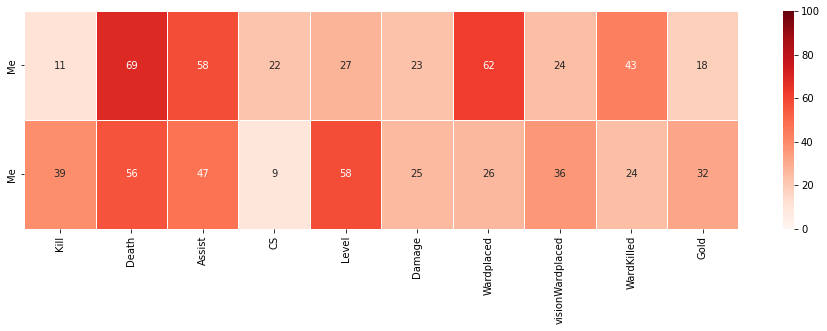

In [94]:
plt.figure(figsize = (16, 4))
sns.heatmap(my_Total_rank, vmin = 0, vmax = 100, annot=True, linewidths = 0.5,  fmt='d', cmap = 'Reds', center = 50)

<AxesSubplot:>

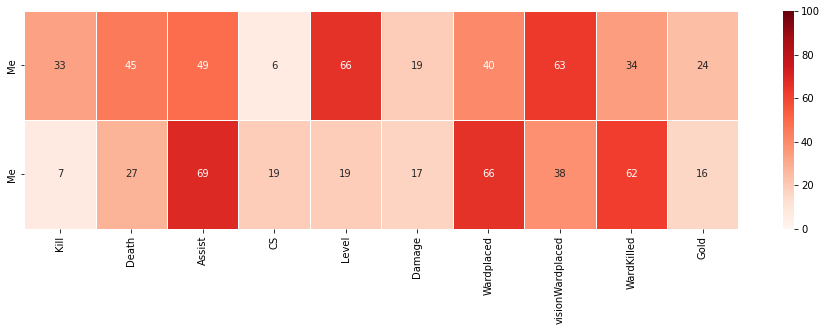

In [95]:
plt.figure(figsize = (16, 4))
sns.heatmap(my_mmr_rank[my_mmr_rank.columns[4:]], vmin = 0, vmax = 100, annot=True, linewidths = 0.5,  fmt='d', cmap = 'Reds', center = 50)

In [103]:
####################################################################################